In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import re


In [3]:
train_df = pd.read_csv("Divar.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_6988\960344712.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("Divar.csv")


In [4]:
train_df.iloc[:,25:43].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   deed_type                253458 non-null  object
 1   has_business_deed        34679 non-null   object
 2   floor                    541748 non-null  object
 3   rooms_count              845899 non-null  object
 4   total_floors_count       304352 non-null  object
 5   unit_per_floor           302283 non-null  object
 6   has_balcony              506411 non-null  object
 7   has_elevator             541749 non-null  object
 8   has_warehouse            728155 non-null  object
 9   has_parking              728156 non-null  object
 10  construction_year        815828 non-null  object
 11  is_rebuilt               529470 non-null  object
 12  has_water                33444 non-null   object
 13  has_warm_water_provider  379500 non-null  object
 14  has_electricity    

In [47]:
df_subset = pd.concat([train_df.iloc[:, :3],train_df.iloc[:, 6:10],train_df.iloc[:, 25:43]], axis=1)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Unnamed: 0               1000000 non-null  int64 
 1   cat2_slug                1000000 non-null  object
 2   cat3_slug                999999 non-null   object
 3   user_type                288882 non-null   object
 4   description              1000000 non-null  object
 5   title                    999946 non-null   object
 6   rent_mode                352994 non-null   object
 7   deed_type                253458 non-null   object
 8   has_business_deed        34679 non-null    object
 9   floor                    541748 non-null   object
 10  rooms_count              845899 non-null   object
 11  total_floors_count       304352 non-null   object
 12  unit_per_floor           302283 non-null   object
 13  has_balcony              506411 non-null   object
 14  has

## deed_type

In [48]:
df_subset.deed_type.value_counts()

deed_type
single_page          194262
written_agreement     31873
other                 20288
multi_page             6466
unselect                569
Name: count, dtype: int64

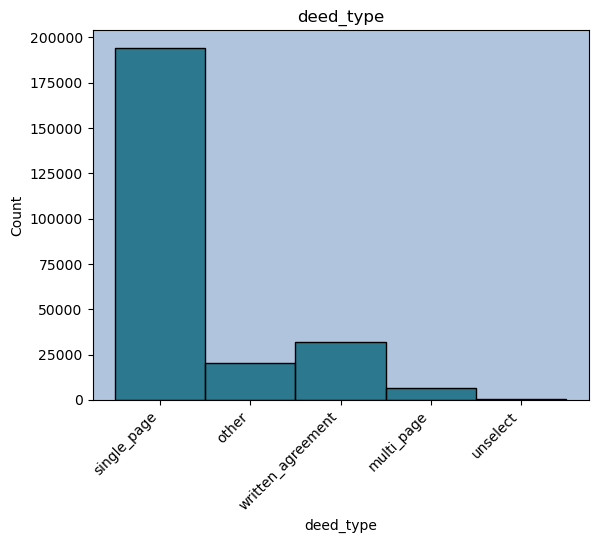

In [49]:
plt.title("deed_type")
sns.histplot(df_subset.deed_type, color="#005f73", bins=100)
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor("lightsteelblue")
plt.show()

In [909]:
df_subset.deed_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: deed_type
Non-Null Count   Dtype 
--------------   ----- 
253458 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


## has_business_deed 

In [50]:
df_subset.has_business_deed.value_counts()
df_subset.has_business_deed = df_subset.has_business_deed.map({False:0, True:1})
df_subset.has_business_deed.value_counts()

has_business_deed
0.0    17428
1.0    17251
Name: count, dtype: int64

## rooms_count

In [51]:
df_subset.rooms_count.value_counts()

rooms_count
دو              404050
یک              192083
سه              138633
بدون اتاق        75898
چهار             21371
پنج یا بیشتر     13864
Name: count, dtype: int64

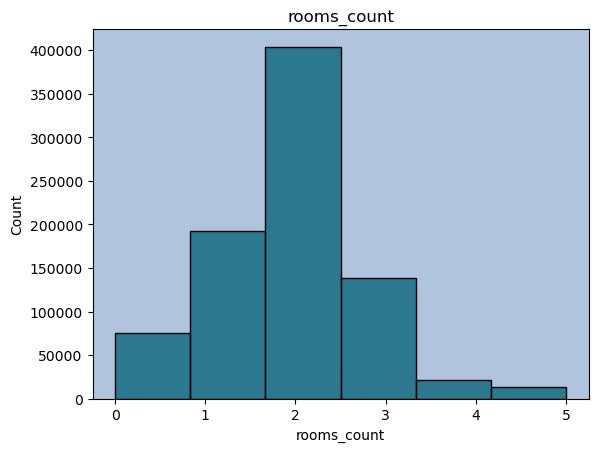

In [52]:
df_subset.rooms_count = df_subset.rooms_count.map({"یک":1, "دو":2, "سه":3, "بدون اتاق":0, "چهار":4, "پنج یا بیشتر":5})
plt.title("rooms_count")
sns.histplot(df_subset.rooms_count, color="#005f73", bins=6)
plt.gca().set_facecolor("lightsteelblue")

In [53]:
print("nan rooms_count:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["rooms_count"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan rooms_count:
nan count for villa =  1 - 0.007752538956508256 % 
nan count for apartment-sell =  6 - 0.0019776851195675463 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  11 - 0.050331731869137496 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  15 - 0.012320024968583936 % 
nan count for house-villa-rent =  11 - 0.01700732861251121 % 
nan count for shop-rent =  30 - 0.06522731720044354 % 
nan count for industry-agriculture-business-rent =  382 - 4.172583287820863 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  581 - 4.90253987005316 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  4 - 0.024293956878226542 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  4 - 0.7421150278293135 % 


In [54]:
po_mask = ((df_subset.cat3_slug == "plot-old"))

df_subset.loc[po_mask, "rooms_count"] = 0

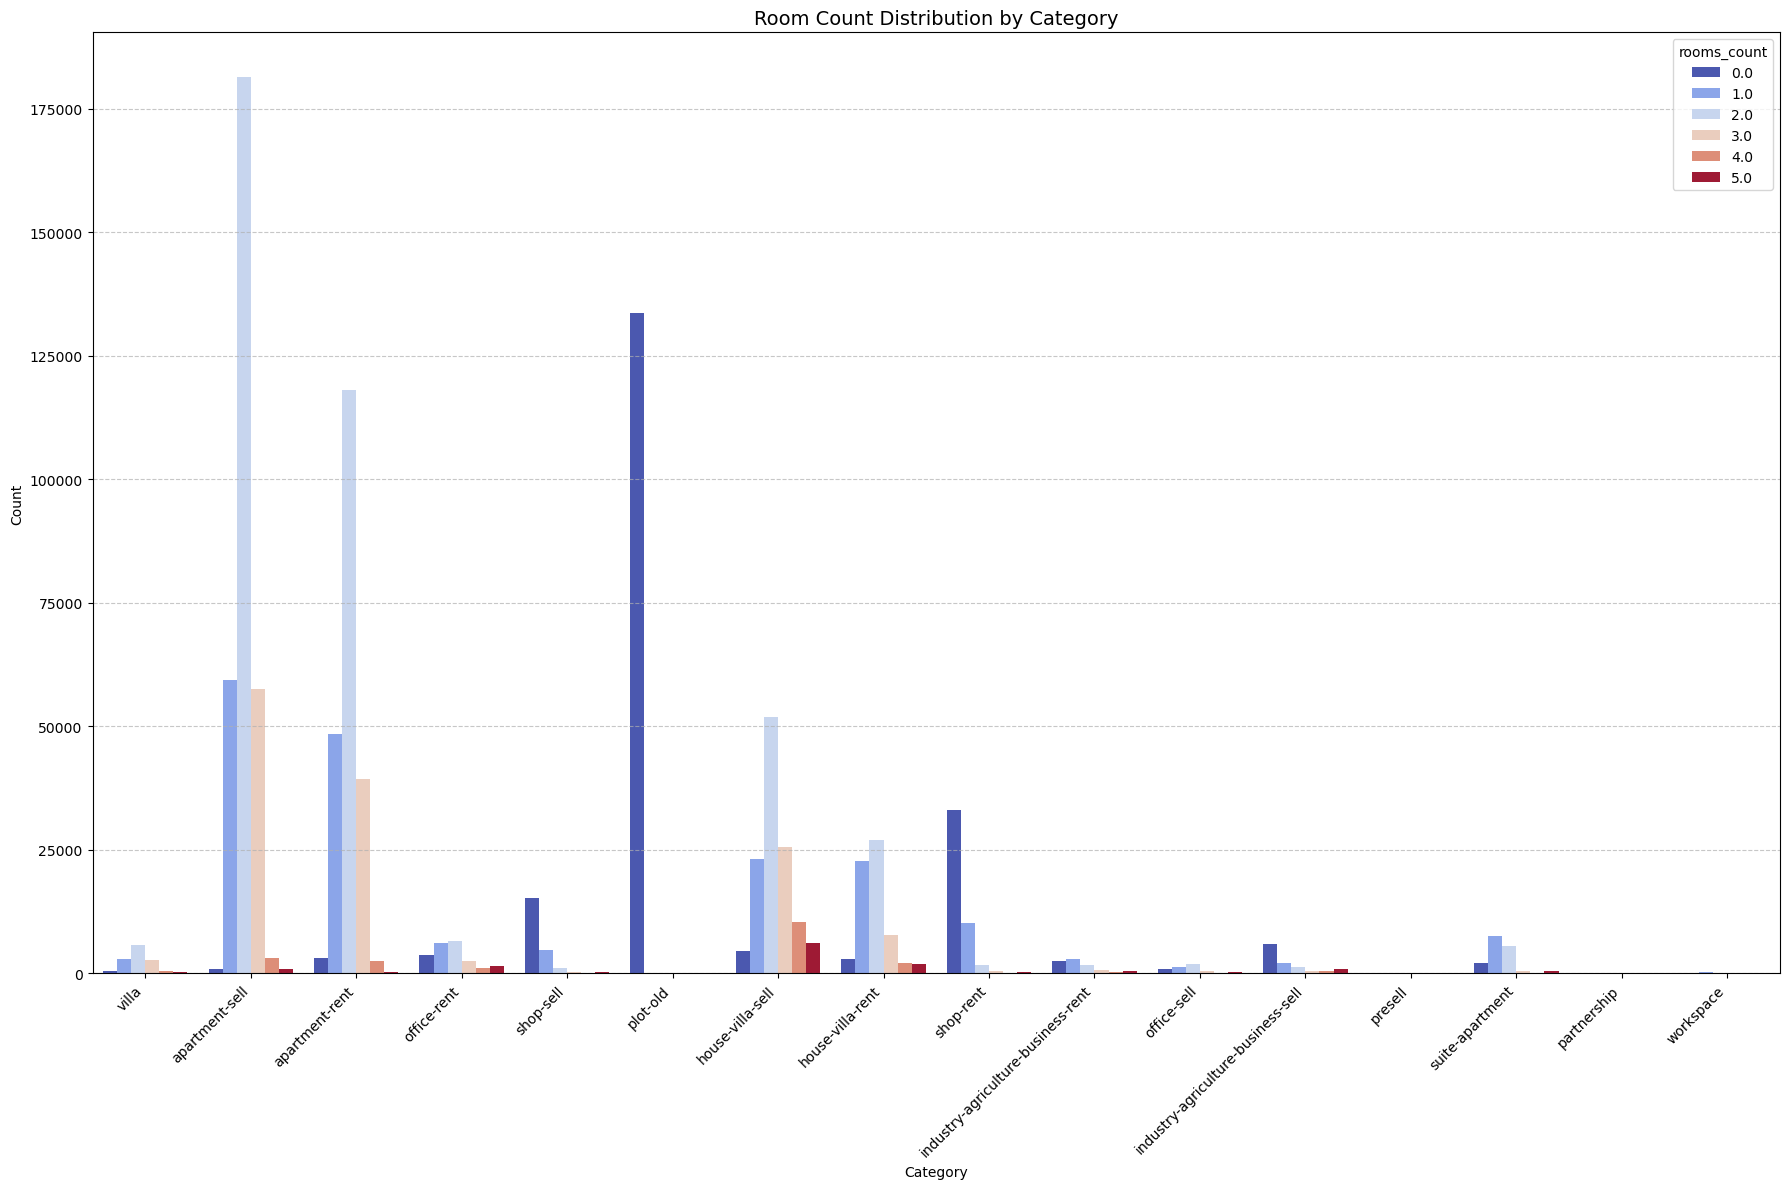

In [55]:
plt.figure(figsize=(18, 12))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue="rooms_count",
    palette="coolwarm" 
)
plt.title("Room Count Distribution by Category", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key="my key")

def extract_room_count_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads.
    Extract the **number of rooms (bedrooms)** for each ad.

    **Rules:**
    1. Return only a single integer number representing the total rooms (bedrooms).
    2. Convert Persian digits and Persian words (like 'سه', 'دو') to standard digits.
    3. Accept various ways of expressing room count:
        - "۲ خوابه", "دو خواب", "دارای سه اتاق", "سه خوابه", "1 bedroom", etc.
    4. If multiple numbers appear (e.g., “دو طبقه و سه خواب”), use the one referring to rooms or bedrooms.
    5. If the ad doesn't mention room count explicitly, return null.
    6. Ignore unrelated numbers (area, price, floor, phone, etc.).
    7. Return only a **valid JSON array** of integers or nulls in the same order as the ads.

    **Examples:**
    - "آپارتمان دو خوابه ۱۰۰ متری" → 2
    - "واحد سه خوابه در طبقه دوم" → 3
    - "ویلا ۴ خوابه با استخر" → 4
    - " خانه یک طبقه بدون اشاره به خواب" → null
    - "آپارتمان لوکس ۲ اتاق و ۱۰۰ متری" → 2
    - "آپارتمان لوکس سه اطاق و ۱۰۰ متری" → 3

    Now process the following ads:
    {ads_text}
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0)

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '').replace('```', '').strip()

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except Exception as e:
        print("Whole null (parse error):", e)
        results = [None] * len(texts)

    return results


persian_numbers = ["صفر","یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False


In [28]:
import tqdm

BATCH_SIZE = 20

categories = ["apartment-sell", "apartment-rent", "office-rent", 
                "office-sell", "shop-sell", "shop-rent", "presell",
                "industry-agriculture-business-rent", 
                "industry-agriculture-business-sell", 
                "suite-apartment", "workspace", "house-villa-sell", "house-villa-rent"]

mask = ((df_subset["cat3_slug"].isin(categories)) & (df_subset.rooms_count.isna()))
rows_to_process = df_subset[mask]

if "room_count_ai" not in df_subset.columns:
    df_subset["room_count_ai"] = None


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"),
        axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}"
        for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    room_count_list = extract_room_count_batch(texts)

    for idx, value in zip(batch_rows_filtered.index, room_count_list):
        if value is None:
            df_subset.loc[idx, "room_count_ai"] = np.nan
        elif isinstance(value, list):
            df_subset.loc[idx, "room_count_ai"] = np.nan
        else:
            df_subset.loc[idx, "room_count_ai"] = value if value > 0 else np.nan

    room_count_list.clear()

100%|██████████| 846/846 [30:36<00:00,  2.17s/it]  


In [29]:
pd.DataFrame.to_csv(df_subset.room_count_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\room_count_ai.csv")

In [56]:
df_subset["room_count_ai"] = pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\room_count_ai.csv")["room_count_ai"]

In [57]:
room_ai_mask = (mask & ~(df_subset.room_count_ai.isna()))
print(f"room ai: {room_ai_mask.sum()}")

room ai: 5891


In [58]:
df_subset.loc[room_ai_mask, "rooms_count"] = df_subset.loc[room_ai_mask, "room_count_ai"]

In [59]:
df_subset.loc[df_subset["rooms_count"] >= 6, "rooms_count"] = np.nan

In [60]:
print("nan rooms_count:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["rooms_count"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan rooms_count:
nan count for villa =  1 - 0.007752538956508256 % 
nan count for apartment-sell =  2 - 0.000659228373189182 % 
nan count for apartment-rent =  10 - 0.0047196526335661695 % 
nan count for office-rent =  67 - 0.31282099168923333 % 
nan count for shop-sell =  11 - 0.050331731869137496 % 
nan count for plot-old =  0 - 0.0 % 
nan count for house-villa-sell =  8 - 0.006570679983244766 % 
nan count for house-villa-rent =  10 - 0.015461207829555644 % 
nan count for shop-rent =  28 - 0.06087882938708064 % 
nan count for industry-agriculture-business-rent =  357 - 3.8995084653194976 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  544 - 4.590329929963716 % 
nan count for presell =  9974 - 63.20258538749129 % 
nan count for suite-apartment =  3 - 0.018220467658669907 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  4 - 0.7421150278293135 % 


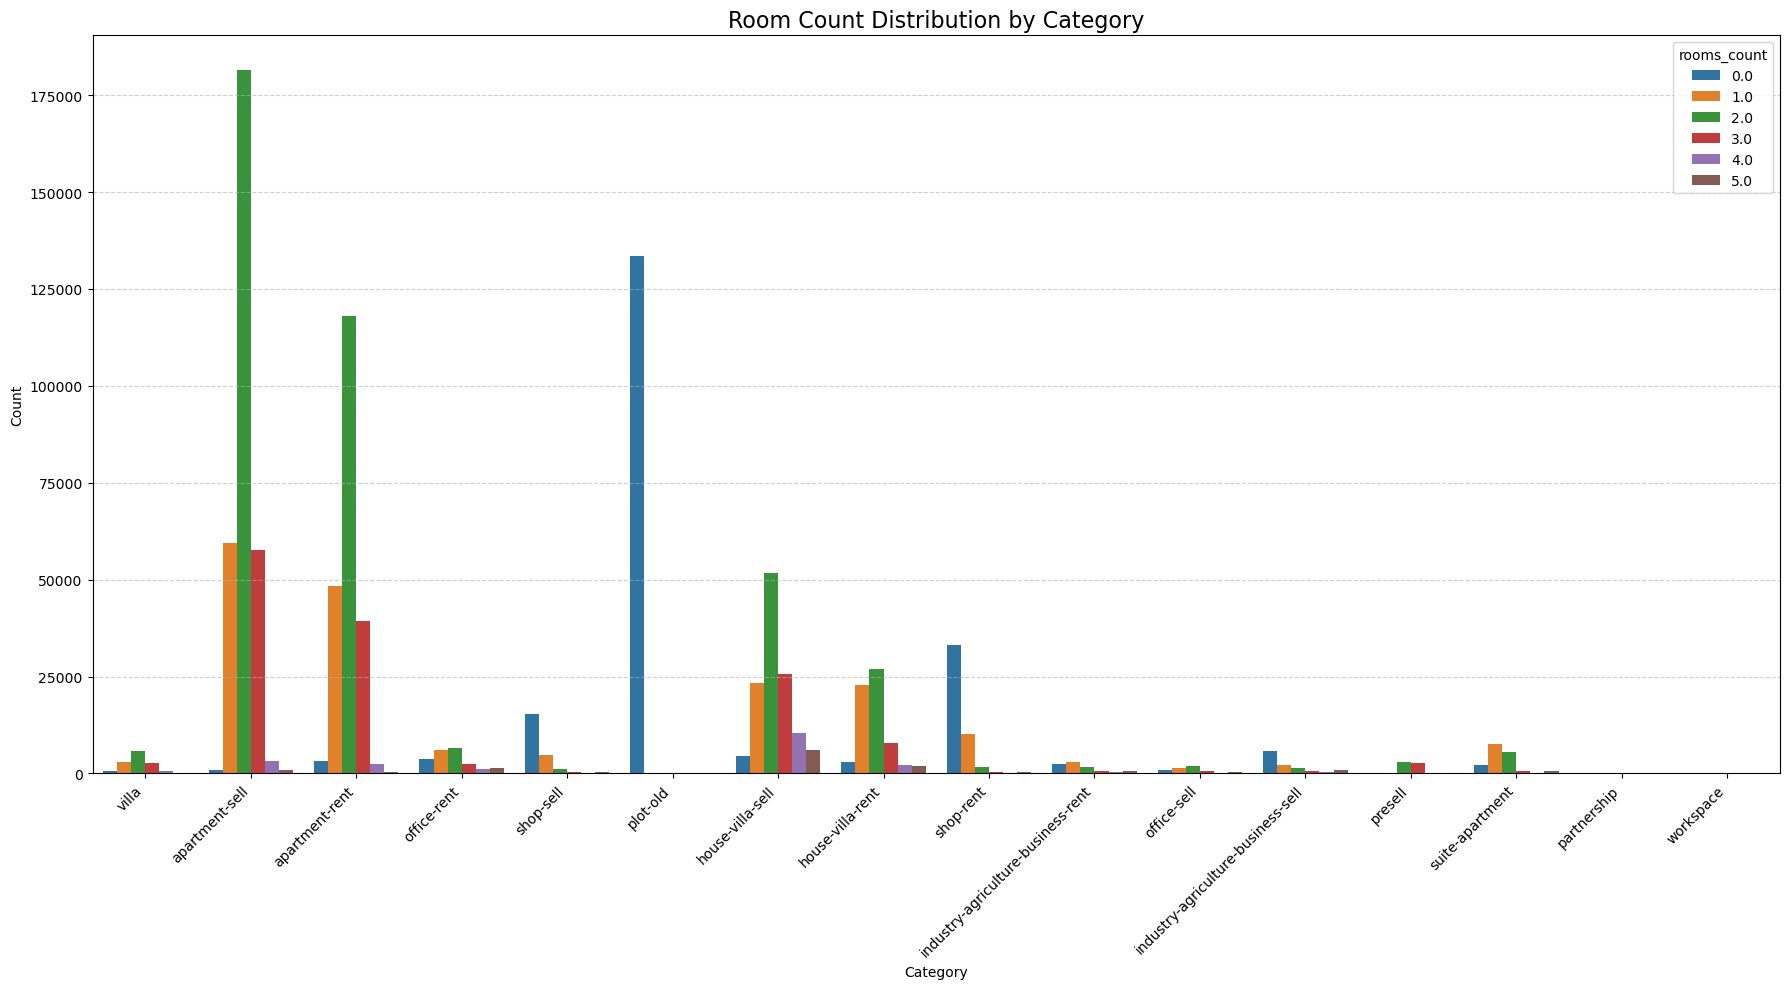

In [61]:
plt.figure(figsize=(18, 10))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue=df_subset["rooms_count"].astype("category"),  # force categorical
    palette="tab10"  # or "tab10", "Set2", "Paired" for distinct hues
)
plt.title("Room Count Distribution by Category", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [62]:
df_subset["rooms_count"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: rooms_count
Non-Null Count   Dtype  
--------------   -----  
985358 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


## floor

In [63]:
df_subset["floor"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: floor
Non-Null Count   Dtype 
--------------   ----- 
541748 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [64]:
print("nan floor:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["floor"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan floor:
nan count for villa =  12899 - 100.0 % 
nan count for apartment-sell =  8 - 0.002636913492756728 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  21855 - 100.0 % 
nan count for plot-old =  133570 - 100.0 % 
nan count for house-villa-sell =  121753 - 100.0 % 
nan count for house-villa-rent =  64678 - 100.0 % 
nan count for shop-rent =  45993 - 100.0 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  11850 - 99.99156189351109 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 


In [65]:
zero_floor_cat = ["villa", "plot-old", "house-villa-sell", "house-villa-rent", "industry-agriculture-business-rent",
                  "industry-agriculture-business-sell"]

df_subset.loc[df_subset["cat3_slug"].isin(zero_floor_cat), "floor"] = 0

In [67]:
df_subset.floor.value_counts()

floor
 0       353927
 2       128431
 1       119495
 3       109256
 4        71885
 5        37586
 0        35834
 6        13774
 7         5708
 -1        4462
 8         3297
 10        2299
 9         2192
 11        1473
 12        1232
 13         834
 14         782
 30+        675
 15         450
 16         313
 17         269
 20         213
 18         188
 19         153
 21         115
 25         102
 2.0         86
 22          86
 23          76
 1.0         70
 3.0         68
 30          62
 24          61
 4.0         42
 27          35
 28          32
 26          25
 29          20
 5.0         18
 6.0         10
 7.0          5
 10.0         3
-1.0          2
 20.0         1
 8.0          1
 18.0         1
 22.0         1
 14.0         1
 9.0          1
 11.0         1
Name: count, dtype: int64

In [68]:
import re
def object_to_int(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    
    if val.endswith("+"):
        return int(val.replace("+", ""))
    
    if re.match(r"more[_ ]than[_ ](\d+)", val):
        return int(re.findall(r"\d+", val)[0]) + 1 
    
    
    
    if val == "unselect":
        return -1
    
    return int(float(val))



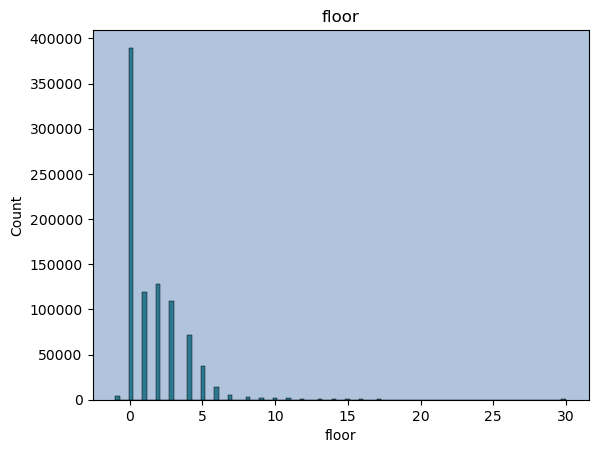

In [69]:
df_subset.floor = df_subset.floor.apply(object_to_int)
plt.title("floor")
sns.histplot(df_subset.floor, color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

In [70]:
df_subset.floor.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: floor
Non-Null Count   Dtype  
--------------   -----  
895653 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


## total_floors_count

In [491]:
df_subset.total_floors_count = df_subset.total_floors_count.apply(object_to_int)

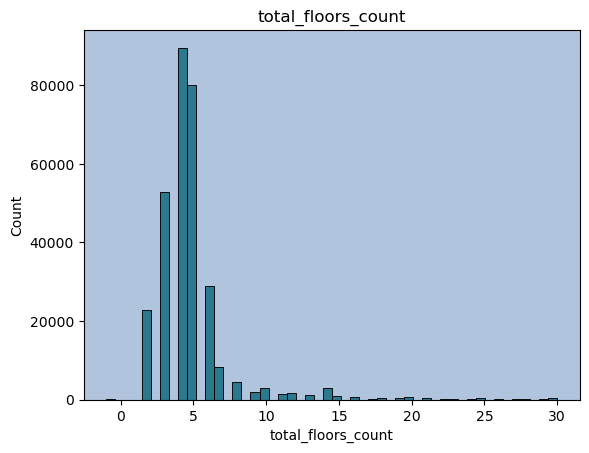

In [492]:
plt.title("total_floors_count")
sns.histplot(df_subset.total_floors_count, color="#005f73", bins=50)
plt.gca().set_facecolor("lightsteelblue")

## unit_per_floor

In [41]:
df_subset.unit_per_floor.value_counts()

unit_per_floor
2              119794
1               97712
4               36918
3               31423
6                4899
5                4811
8                3471
more_than_8      2083
7                 926
unselect          246
Name: count, dtype: int64

In [493]:
df_subset.unit_per_floor = df_subset.unit_per_floor.apply(object_to_int)

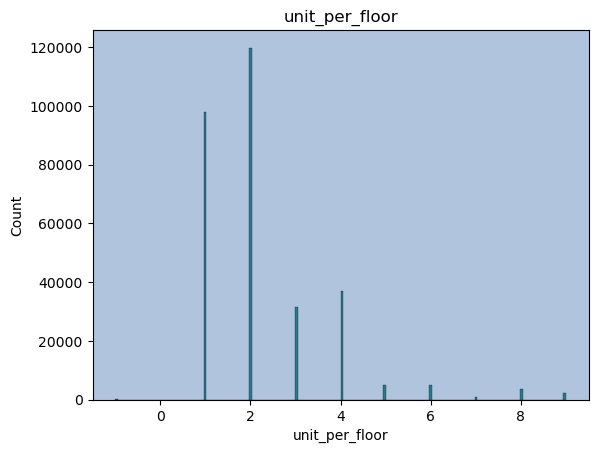

In [494]:
plt.title("unit_per_floor")
sns.histplot(df_subset.unit_per_floor, color="#005f73")
plt.gca().set_facecolor("lightsteelblue")

## has_balcony 

In [47]:
df_subset.has_balcony.value_counts()

has_balcony
true        392096
false        88855
True         20692
False         4545
unselect       223
Name: count, dtype: int64

In [495]:
def clean_bool(x):
    if isinstance(x, str):
        x_lower = x.strip().lower()
        if re.fullmatch(r"(true|false)", x_lower):
            return 1 if x_lower == "true" else 0
        elif x_lower == "unselect":
            return -1
    elif isinstance(x, bool):
        return int(x)
    else:
        return np.nan

## has_elevator

In [496]:
df_subset.has_elevator.value_counts()

has_elevator
True     365148
False    176601
Name: count, dtype: int64

## has_warehouse

In [ ]:
df_subset.has_warehouse.value_counts()

has_warehouse
1.0    582313
0.0    145842
Name: count, dtype: int64

## has_parking

In [ ]:

df_subset.has_parking.value_counts()

has_parking
1.0    552542
0.0    175614
Name: count, dtype: int64

## construction_year

In [71]:
def persian_to_english(s):
    persian_digits = "۰۱۲۳۴۵۶۷۸۹"
    english_digits = "0123456789"
    trans = str.maketrans(persian_digits, english_digits)
    return str(s).translate(trans)

def clean_year(val):
    val = persian_to_english(val)
    if "قبل" in val:
        return 1369
    if re.match(r"^\d+$", val):
        return int(val)
    return np.nan

In [72]:
df_subset.construction_year.value_counts()

construction_year
۱۴۰۳           116260
۱۳۹۰            59139
۱۴۰۲            58424
۱۴۰۰            53674
۱۳۹۵            53029
۱۳۹۸            38207
۱۳۹۷            36326
۱۳۹۶            35487
۱۴۰۱            35328
۱۳۸۵            34065
۱۳۹۹            29594
۱۳۹۳            29094
۱۳۹۲            26130
۱۳۹۴            26110
۱۳۸۸            24268
۱۳۸۰            23480
قبل از ۱۳۷۰     20637
۱۳۸۹            16755
۱۳۹۱            16316
۱۳۸۷            14136
۱۳۸۶            13468
۱۳۸۳             9894
۱۳۸۴             8494
۱۳۷۵             7247
۱۳۸۲             6965
۱۳۷۱             5531
۱۳۸۱             3590
۱۳۷۸             3025
۱۳۷۹             2415
۱۳۷۷             2117
۱۳۷۲             1914
۱۳۷۳             1827
۱۳۷۶             1593
۱۳۷۴             1289
Name: count, dtype: int64

In [73]:
df_subset["construction_year"] = df_subset["construction_year"].apply(clean_year)

In [74]:
df_subset["construction_year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: construction_year
Non-Null Count   Dtype  
--------------   -----  
815828 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [75]:
print("nan construction_year:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["construction_year"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan construction_year:
nan count for villa =  12899 - 100.0 % 
nan count for apartment-sell =  5 - 0.0016480709329729551 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  11 - 0.050331731869137496 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  15 - 0.012320024968583936 % 
nan count for house-villa-rent =  11 - 0.01700732861251121 % 
nan count for shop-rent =  30 - 0.06522731720044354 % 
nan count for industry-agriculture-business-rent =  478 - 5.221190606226106 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  663 - 5.594464602143279 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 


### has_balcony, has_elevator, has_warehouse, has_parking, is_rebuilt, has_water, has_electricity, has_gas

In [499]:
df_subset.has_balcony = df_subset.has_balcony.apply(clean_bool)
df_subset.has_elevator = df_subset.has_elevator.apply(clean_bool)
df_subset.has_warehouse = df_subset.has_warehouse.apply(clean_bool)
df_subset.has_parking = df_subset.has_parking.apply(clean_bool)

df_subset.is_rebuilt = df_subset.is_rebuilt.apply(clean_bool)
df_subset.has_water = df_subset.has_water.apply(clean_bool)
df_subset.has_electricity = df_subset.has_electricity.apply(clean_bool)
df_subset.has_gas = df_subset.has_gas.apply(clean_bool)


## has_warm_water_provider

In [ ]:
df_subset.has_warm_water_provider.value_counts()

has_warm_water_provider
package         205641
water_heater    141082
powerhouse       31395
unselect          1382
Name: count, dtype: int64

In [64]:
df_subset.has_heating_system.value_counts()

has_heating_system
shoofaj          201356
heater           119771
duct_split        22047
floor_heating      7717
split              5845
fan_coil           5065
fireplace          4050
unselect           3118
Name: count, dtype: int64

In [65]:
df_subset.has_cooling_system.value_counts()

has_cooling_system
water_cooler       219266
air_conditioner     52341
split               38708
duct_split          29373
unselect             5917
fan_coil             5014
Name: count, dtype: int64

## is_rebuilt

In [507]:
df_subset.is_rebuilt.unique()

array([nan])

In [76]:
df_subset.is_rebuilt = df_subset.is_rebuilt.map({False:0, True:1})
df_subset.is_rebuilt.value_counts()

is_rebuilt
0.0    353191
1.0    176279
Name: count, dtype: int64

In [77]:
print("nan is_rebuilt:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["is_rebuilt"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan is_rebuilt:
nan count for villa =  12899 - 100.0 % 
nan count for apartment-sell =  78535 - 25.88625014420621 % 
nan count for apartment-rent =  54797 - 25.86228053615254 % 
nan count for office-rent =  21418 - 100.0 % 
nan count for shop-sell =  21855 - 100.0 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  29897 - 24.555452432383596 % 
nan count for house-villa-rent =  8998 - 13.911994805034169 % 
nan count for shop-rent =  45993 - 100.0 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  5155 - 100.0 % 
nan count for industry-agriculture-business-sell =  11851 - 100.0 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 


In [907]:
clean_columns = df_subset.drop(["Unnamed: 0", "cat2_slug", "user_type", "description", "title", "rent_mode"], axis=1)

pd.DataFrame.to_csv(clean_columns, "cleaned_23_42.csv")